# Aprendendo a usar a NumCosmo

Esse arquivo será de introdução, nele tentarei entender e explicar os comandos, funções, entre outros, que ocorrem na biblioteca NumCosmo.

A biblioteca NumCosmo, que é uma abreviação para *Numerical Cosmology*, foi feita para testar modelos cosmológicos usando dados observacionais, ela também é equipada de diversas ferramentas que podem auxiliar o usuário a realizar cálculos que são feitos diversas vezes na área de cosmologia.



## 1 - Iniciando um notebook

Ao começar um novo notebook, é importante inicializar as bibliotecas *NumCosmo* e *NumCosmoMath*. Porém, antes iremos importar o módulo GI.

Esse módulo é utilizado pela NumCosmo para fazer a tradução entre liguagens de programação; como a NumCosmo foi feita em 'C', mas queremos utilizá-la com Python, precisamos utilizar o *GObject*.

In [2]:
try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

from gi.repository import GObject
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm

Agora que já importamos a NumCosmo, com seus apelidos, será útil importar as bibliotecas clássicas para realizar cálculos e gráficos:

- **Numpy**: Diversas funções matemáticas e formas mais práticas de utilizar matrizes
- **Matplotlib**: Capaz de montar gráficos 2D e 3D de alta qualidade
    - inline:  Utilizado em notebooks para o gráfico aparecer logo que é chamado, ao invés de no final 
- **sys**: Fornece informações e manipula o que o interpretador de python está utilizando
- **math**: Conjunto de muitas funções matemáticas
- **ipywidgets**: É utilizado para modificar os valores do gráfico e atualizá-lo em tempo real

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline
import math

import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import FloatSlider

### 1.1 - Iniciando a NumCosmo

Depois de importar sua devidas bibliotecas, é importante que seu primeiro comando seja iniciar a biblioteca e direcionar seu *output* para o próprio notebook que estamos usando; isso é feito por meio dos códigos abaixo.

In [4]:
Ncm.cfg_init ()
Ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

## 2 - Utilizando algumas funções

Agora que já temos tudo pronto, podemos começar a realizar algumas testes com as funções da biblioteca. Primeiro iremos utilizar a seção 'C' da *NumCosmoMath*.

### 2.1 - [Seção C (Constantes)](https://numcosmo.github.io/manual/NcmC.html)

Essa parte da *NumCosmoMath* é onde estão armazenadas diversas constante importantes para a cosmologia, que são utilizadas diversas vezes nas contas com que trabalharemos. Vou utilizar algumas aqui como exemplo:

In [5]:
dir(Ncm.C)

['AR',
 'G',
 'G_mass_solar',
 'Glightyear_Mpc',
 'HI_Lyman_wl3_8pi_2p_2P0_5',
 'HI_Lyman_wl3_8pi_2p_2P3_5',
 'HI_Lyman_wl3_8pi_2p_2Pmean',
 'HI_Lyman_wl3_8pi_2s_2S0_5',
 'HI_Lyman_wl_2p_2P0_5',
 'HI_Lyman_wl_2p_2P3_5',
 'HI_Lyman_wl_2p_2Pmean',
 'HI_Lyman_wl_2s_2S0_5',
 'HI_Lyman_wn_2p_2P0_5',
 'HI_Lyman_wn_2p_2P3_5',
 'HI_Lyman_wn_2p_2Pmean',
 'HI_Lyman_wn_2s_2S0_5',
 'HI_ion_E_1s_2S0_5',
 'HI_ion_E_2p_2P0_5',
 'HI_ion_E_2p_2P3_5',
 'HI_ion_E_2p_2Pmean',
 'HI_ion_E_2s_2S0_5',
 'HI_ion_wn_1s_2S0_5',
 'HI_ion_wn_2p_2P0_5',
 'HI_ion_wn_2p_2P3_5',
 'HI_ion_wn_2p_2Pmean',
 'HI_ion_wn_2s_2S0_5',
 'H_bind',
 'H_reduced_energy',
 'H_reduced_mass',
 'HeII_ion_E_1s_2S0_5',
 'HeII_ion_wn_1s_2S0_5',
 'HeI_Balmer_E_kb_2p_1P1_2s_1S0',
 'HeI_Balmer_E_kb_2p_3Pmean_2s_3S1',
 'HeI_Balmer_wn_2p_1P1_2s_1S0',
 'HeI_Balmer_wn_2p_3Pmean_2s_3S1',
 'HeI_Lyman_wl3_8pi_2p_1P1',
 'HeI_Lyman_wl3_8pi_2p_3P0',
 'HeI_Lyman_wl3_8pi_2p_3P1',
 'HeI_Lyman_wl3_8pi_2p_3P2',
 'HeI_Lyman_wl3_8pi_2p_3Pmean',
 'HeI_Lyman_wl3

In [6]:
Ncm.C.lightyear()

9460730472580800.0

In [7]:
Ncm.C.year()

31557600.0

In [8]:
Ncm.C.mass_1H()

1.6735328383153192e-27

In [9]:
Ncm.C.G()

6.6743e-11

### 2.2 - [Seção de Modelos Cosmológicos](https://numcosmo.github.io/manual/ch03.html)

Agora sairemos da *NumCosmoMath* e voltaremos para a *NumCosmo* para trabalharmos com diferentes modelos cosmológicos. Essa parte da biblioteca inicia com uma classe-mãe chamada *Nc.HICosmo*, ela é uma classe abstrata que define modelos cosmológicos para um universo homogêneo e isotrópico em largas escalas. 

A partir dela teremos diversas outras classes-filhas que possuem métodos específicos para trabalhar em diferentes problemas; um exemplo que será bastante utilizado é o da classe *Nc.HICosmoDE*, para implementar modelos com *Dark Energy*, e suas classes filhas, que utilizam equações de estado diferentes para *Dark Energy*.

Vamos mostrar um exemplo de modelo:

In [10]:
cosmo = Nc.HICosmoDEXcdm.new()

Criamos o objeto 'cosmo' do modelo "DEXcdm" - que significa um modelo que implementa *Dark Energy*(DE), com equação de estado constante(X) e com a matéria escura sendo majoritariamente fria(cdm) - agora podemos utilizar todos os métodos e parâmetros dessa classe e de suas ancestrais. Contudo, sera agradável utilizar outra função para mostrar todos esses parâmetros antes.

#### 2.2.1 - [Seção Model Set](https://numcosmo.github.io/manual/NcmMSet.html#)

Nessa seção encontraremos uma função que ajudará a mostrar os valores dos parâmetros do modelo cosmológico. Iremos, primeiro, fornecer nosso objeto e depois chamar a função *pretty_log* para imprimir o que buscamos.

In [11]:
mset = Ncm.MSet.new_array([cosmo])
mset.pretty_log()

#----------------------------------------------------------------------------------
# Model[03000]:
#   - NcHICosmo : XCDM - Constant EOS
#----------------------------------------------------------------------------------
# Model parameters
#   -      H0[00]:  67.36               [FIXED]
#   -  Omegac[01]:  0.2568              [FIXED]
#   -  Omegax[02]:  0.7                 [FIXED]
#   - Tgamma0[03]:  2.7245              [FIXED]
#   -      Yp[04]:  0.24                [FIXED]
#   -    ENnu[05]:  3.046               [FIXED]
#   -  Omegab[06]:  0.0432              [FIXED]
#   -       w[07]: -1                   [FIXED]


Com isso, podemos alterar o valor dessas constantes para fazer experimentações no nosso modelo.

In [12]:
cosmo.param_set_by_name('Omegac', 0.9)
cosmo.param_set_by_name('Omegax', 0)
cosmo.param_set_by_name('Omegab', 0.1)

In [13]:
mset.pretty_log()

#----------------------------------------------------------------------------------
# Model[03000]:
#   - NcHICosmo : XCDM - Constant EOS
#----------------------------------------------------------------------------------
# Model parameters
#   -      H0[00]:  67.36               [FIXED]
#   -  Omegac[01]:  0.9                 [FIXED]
#   -  Omegax[02]:  0                   [FIXED]
#   - Tgamma0[03]:  2.7245              [FIXED]
#   -      Yp[04]:  0.24                [FIXED]
#   -    ENnu[05]:  3.046               [FIXED]
#   -  Omegab[06]:  0.1                 [FIXED]
#   -       w[07]: -1                   [FIXED]


In [14]:
cosmo.param_set_by_name('Omegac', 0.2568)
cosmo.param_set_by_name('Omegax', 0.7)
cosmo.param_set_by_name('Omegab', 0.0432)

#### 2.2.2 - Função de Hubble Normalizada (E)

A função de Hubble "H(t)" nos dá uma ideia de qual era a velocidade de afastamento de objetos cósmicos em um determinado tempo 't'. Quando falamos da função de Hubble normalizada, estamos trabalhando só com a proporção desse valor com o valor medido atualmente, também conhecido como constante de Hubble (H0).

$$E(t) \equiv \frac{H(t)}{H_0},$$

A função 'E' do nosso modelo cosmológico tem como parâmetro de entrada o valor do redshift do momento que está sendo calculada. Por exemplo:

In [31]:
print(f"E(z = 0): {cosmo.E(0)}\nE(z = 1): {cosmo.E(1)}\nE(z = 1000): {cosmo.E(1000)}\n")

E(z = 0): 1.0
E(z = 1): 1.7609954124297043
E(z = 1000): 19832.79755707815



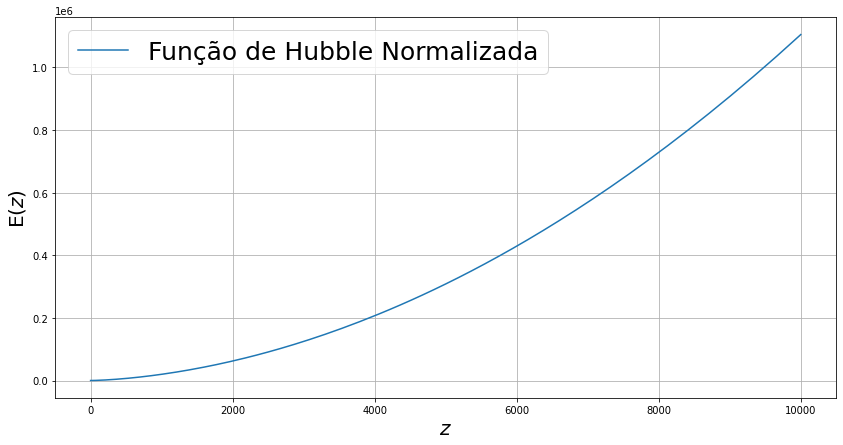

In [32]:
plt.figure(figsize=(14,7))
z_a = np.geomspace(1.0e-2, 1.0e4, num=400)
E_a = np.array ([cosmo.E(z) for z in z_a])

plt.plot(z_a, E_a, label="Função de Hubble Normalizada")

plt.xlabel("$z$",fontsize=20)
plt.ylabel("E($z$)", fontsize=20)
plt.legend(fontsize=25, loc="best")
plt.grid ()
plt.show ()